In [92]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
import numpy as np

## Plotting Arrangements

### General Structure

#### By Expiration ATM
- Option Type (P / C / P & C)
- Exact DOE / TTE Period (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) / Full Normal Cycles (No weeklys) / Weeklys
- Metric: Nominal Price / OI / Vol / IV / delta / gamma / vega / theta / rho

#### By Strike Price (EXP)
- Option Type (P / C / P & C)
- Strike Range (numerical range, full)
- Exact DOE / TTE Period (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) / Full Normal Cycles (No weeklys) / Weeklys
- Metric: Nominal Price / OI / Vol / IV / delta / gamma / vega / theta / rho


In [359]:
ticker = 'SPCE'

In [240]:
class PlottingHelper:

    # Constructs and returns the horzontal axis containing Date of Expiration values.
    # Traverses directories and selects dates based on the mode chosen.
    
    # Mode: Exact, Range, Regular, Weeklies

    def getDoeAxis(self, mode, args):

        # Read in all Expirations available on Disk
        expirations_all = os.listdir(path = '../Data/' + ticker)

        # Track valid expirations as per the mode chosen
        valid_expirations = []
        today_y = datetime.datetime.today().strftime('%y')
        today_m = datetime.datetime.today().strftime('%m')
        today_d = datetime.datetime.today().strftime('%d')


        # Range + (30D / 60D / 90D / 180D / 1Y / 1Y6M / 2Y / Max) as String
        # Defaults to MAX range on ambiguos/uninitialized range argument
        if (mode == 'range'):

            match args:

                # Expirations within one month away from today (Uses the same date)
                case '30D':
                    
                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 30 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()
        
                    return valid_expirations_sorted


                # Expirations within two months away from today (Uses the same date)
                case '60D':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 60 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted

                # Expirations within three months away from today (Uses the same date)
                case '90D':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 90 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted                   

                # Expirations within six month away from today (Uses the same date)
                case '180D':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 180 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted
                
                # Expirations within one year away from today (Uses the same date)
                case '1Y':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 365 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted


                # Expirations within one month away from today
                case '1Y6M':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 548 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted                    


                # Expirations within one month away from today
                case '2Y':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 730 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted                          

                # Expirations within one month away from today
                case '3Y':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference <= 1095 and dayDifference >= 0:
                            valid_expirations.append(each)
                    
                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

                    return valid_expirations_sorted  

                # Use all available Expiration Dates
                case 'MAX':

                    for each in expirations_all:

                        # Take the difference in days
                        dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                        # Add expirations in the current month past today
                        if each not in valid_expirations and dayDifference >= 0:
                            valid_expirations.append(each)

                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()
        
                    return valid_expirations_sorted

                # Defaults to Maximum
                case _:
                    return



        # Exact + Args: date in Y-M-D format
        # Chosen by a user from the menu list

        # TODO:
        # Transform into data request instead of plotting

        if (mode == 'exact') and (args != 0):
            
            for each in expirations_all:

                if each not in valid_expirations and each == args:
                    valid_expirations.append(each)
        
            return pd.to_datetime(valid_expirations)


        # Quarterlies
        if (mode == 'quarterly'): 

            for each in expirations_all:

                # Take the difference in days
                dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                if each not in valid_expirations and dayDifference >= 0 and self.isQuarterly(each):
                    valid_expirations.append(each)

            valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
            valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()
        
            return valid_expirations_sorted


        # Weeklies
        if (mode == 'weekly'): 

            for each in expirations_all:

                # Take the difference in days
                dayDifference = (pd.to_datetime(each) - datetime.datetime.today()).days

                if each not in valid_expirations and dayDifference >= 0 and self.isWeekly(each):
                    valid_expirations.append(each)

            valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
            valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()
        
            return valid_expirations_sorted

    

    # Third friday can be between 14th (Month starts on Friday) and 21st (Month starts on Monday) of the month
    def isThirdFriday(self, doe_string):

        stringDT = pd.to_datetime(doe_string)
        
        return (stringDT.weekday() == 4 and stringDT.day > 14 and stringDT.day < 21)


    # January - 1 / February - 2 / March - 3
    # Third fridays of which months?
    def getCycle(self, doe_string):
        yield


    # Assure is a regular cycle option
    def isQuarterly(self, doe_string):
        return self.isThirdFriday(doe_string)

    # Not expiring on the third friday
    def isWeekly(self, doe_string):
        return not (self.isThirdFriday(doe_string))


In [357]:
class PlottingMain:

    # Plots specified metrics for ATM options according to specified Option Type / DOE settings
    # 
    # Expected Input:
    # o_type: Contract Type: C / P / C & P
    # DOE Type: Exact, Range, Regular, Weeklies + ARGS in a LIST
    # metric: string
    
    # Retrieve ATM data as the first element in [Type][ITM = True]

    def plotDoeATM(o_type, doe_type, metric, atm_price):

        # Helper Instance Initialized
        plotHelper = PlottingHelper()

        # GET THE X AXIS
        axis_type, axis_range = doe_type

        doe_axis = plotHelper.getDoeAxis(axis_type, axis_range)

        data_axis = dict()

        for each in doe_axis:

            indir = '../Data/' + ticker + '/' + str(each.year) + '-' + str(each.month) + '-' + str(each.day) + '/'
            list = os.listdir(path = indir)

            list_paths = [indir + filename for filename in list]

            newest = max(list_paths, key = os.path.getctime)

            # Reads in the CSV for the corresponding DOEs:
            data = pd.read_csv(newest, sep = ',')
            data = data[data.Type == o_type][data.strike == atm_price][metric]

            data_axis[str(each.year) + '-' + str(each.month) + '-' + str(each.day)] = data

        list_axis = []
        list_values = []
        
        for each1 in [str(each.year) + '-' + str(each.month) + '-' + str(each.day) for each in doe_axis]:

            # Handling empty lists of values
            if(len(data_axis[each1].values) != 0):
                list_axis.append(each1)
                list_values.append(data_axis[each1].iloc[0])

        plt.figure(figsize = (43, 10))
        plt.plot(list_axis, list_values)


    # Plots Multiple Curves (Different Expiration Dates) for the specified strike range
    def plotDoeStrike(o_type, strike_range, doe_mode, metric):

        # Get DOE axes (Used for data retrieval)

        plottingHelper = PlottingHelper()

        # mode and arguments
        kekos, kokos = doe_mode

        doe_axis = plottingHelper.getDoeAxis(kekos, kokos)

        # Retrieve the Strike_range Axis / values for the chosen option type

        data_axis = dict()

        strike_axis_ticks = []

        # Traverse the expiration axis
        

        data_strikes = dict()

        for each in doe_axis:

            indir = '../Data/' + ticker + '/' + str(each.year) + '-' + str(each.month) + '-' + str(each.day) + '/'
            list = os.listdir(path = indir)

            list_paths = [indir + filename for filename in list]

            newest = max(list_paths, key = os.path.getctime)

            # Reads in the CSV for the corresponding DOEs:
            data = pd.read_csv(newest, sep = ',')
            
            data = data[data.Type == o_type][data.strike >= strike_range[0]][data.strike <= strike_range[1]]

            strike_axis_ticks.append(len(data))

            data_axis[str(each.year) + '-' + str(each.month) + '-' + str(each.day)] = data[metric]
            data_strikes[str(each.year) + '-' + str(each.month) + '-' + str(each.day)] = data.strike


        # print(data_axis)


        list_axis = []
        list_values = []

        i = 0

        plt.figure(figsize = (50, 20))


        # For each expiration
        for each1 in [str(each.year) + '-' + str(each.month) + '-' + str(each.day) for each in doe_axis]:

            # Handling empty lists of values
            if(len(data_axis[each1].values) != 0):
                # list_axis.append(each1)
                # list_values.append(data_axis[each1].iloc[0])
                plt.plot(data_strikes[each1], data_axis[each1], linewidth = 3)

            i = i + 1

        plt.rc('xtick', labelsize=48) 
        plt.rc('ytick', labelsize=48)

        plt.legend(data_strikes.keys(), fontsize = 35)

        imagename = ticker + '-' + str(datetime.datetime.today().year) + '-' + (str(datetime.datetime.today().month)) + '-' + str(datetime.datetime.today().day) + '-' + str(datetime.datetime.today().hour) + str(datetime.datetime.today().minute) + str(datetime.datetime.today().second) + '::' + str(strike_range[0]) + '-' + str(strike_range[1])

        plt.savefig('../Images/' + imagename + '.jpeg', dpi = 'figure', bbox_inches='tight')
        # Plot metrics (X DOE curves + corresponding values)

        return imagename


/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1831394333.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1831394333.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1831394333.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1831394333.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1831394333.py:35: UserW

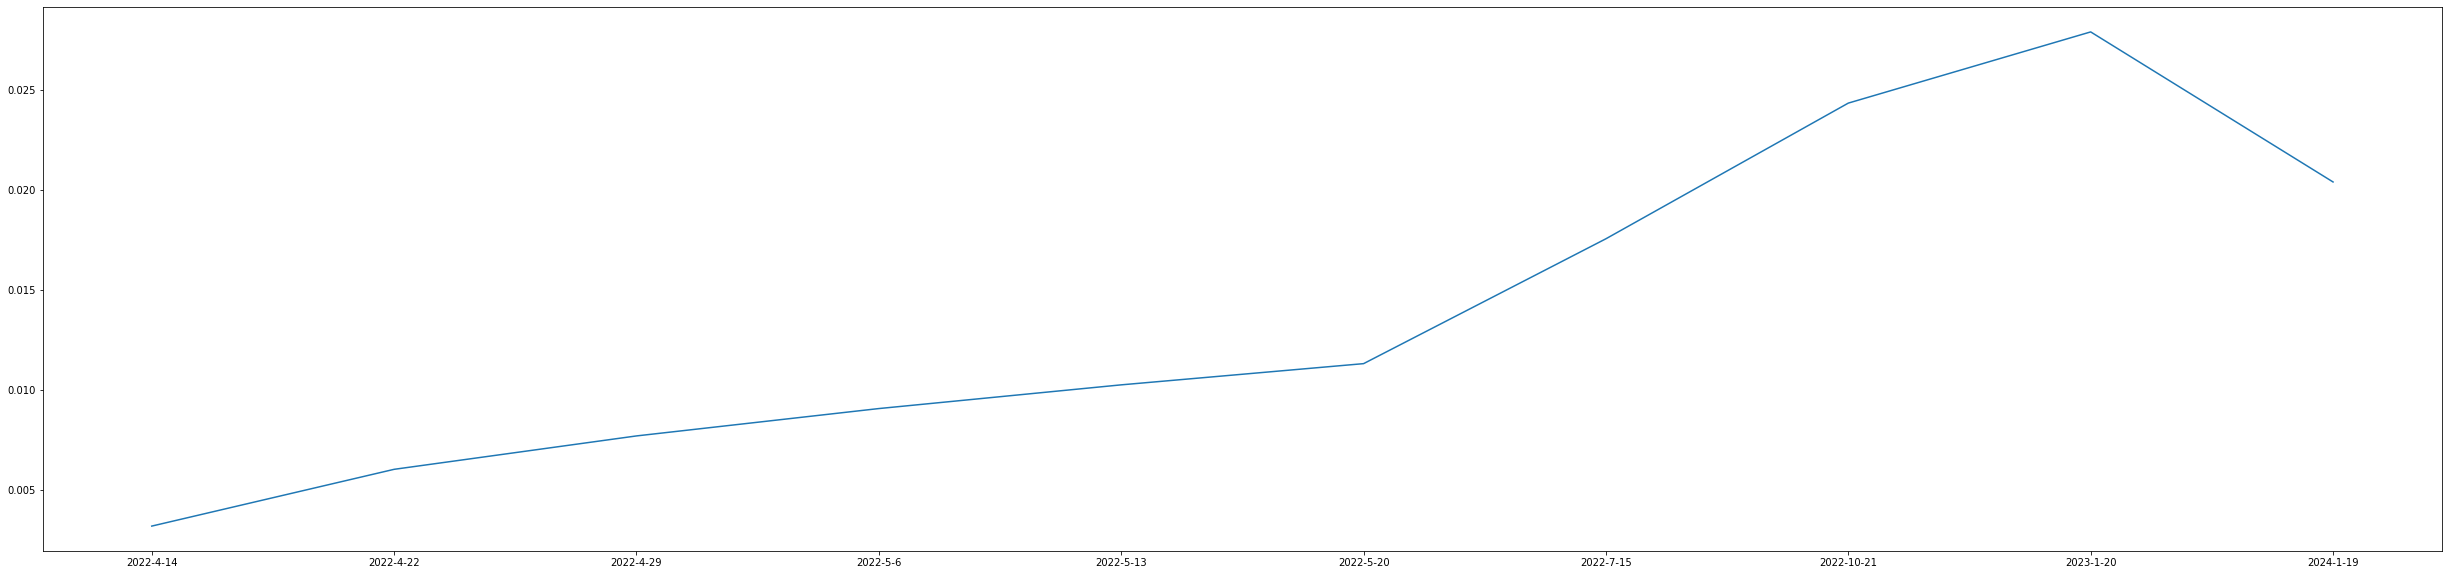

In [260]:
PlottingMain.plotDoeATM('C', ['range', 'MAX'], 'vega', 8)

/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/4094125075.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike >= strike_range[0]][data.strike <= strike_range[1]]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/4094125075.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike >= strike_range[0]][data.strike <= strike_range[1]]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/4094125075.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike >= strike_range[0]][data.strike <= strike_range[1]]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/4094125075.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike >= strike_range[0]][

'SPCE-2022-4-10-183026::4-15'

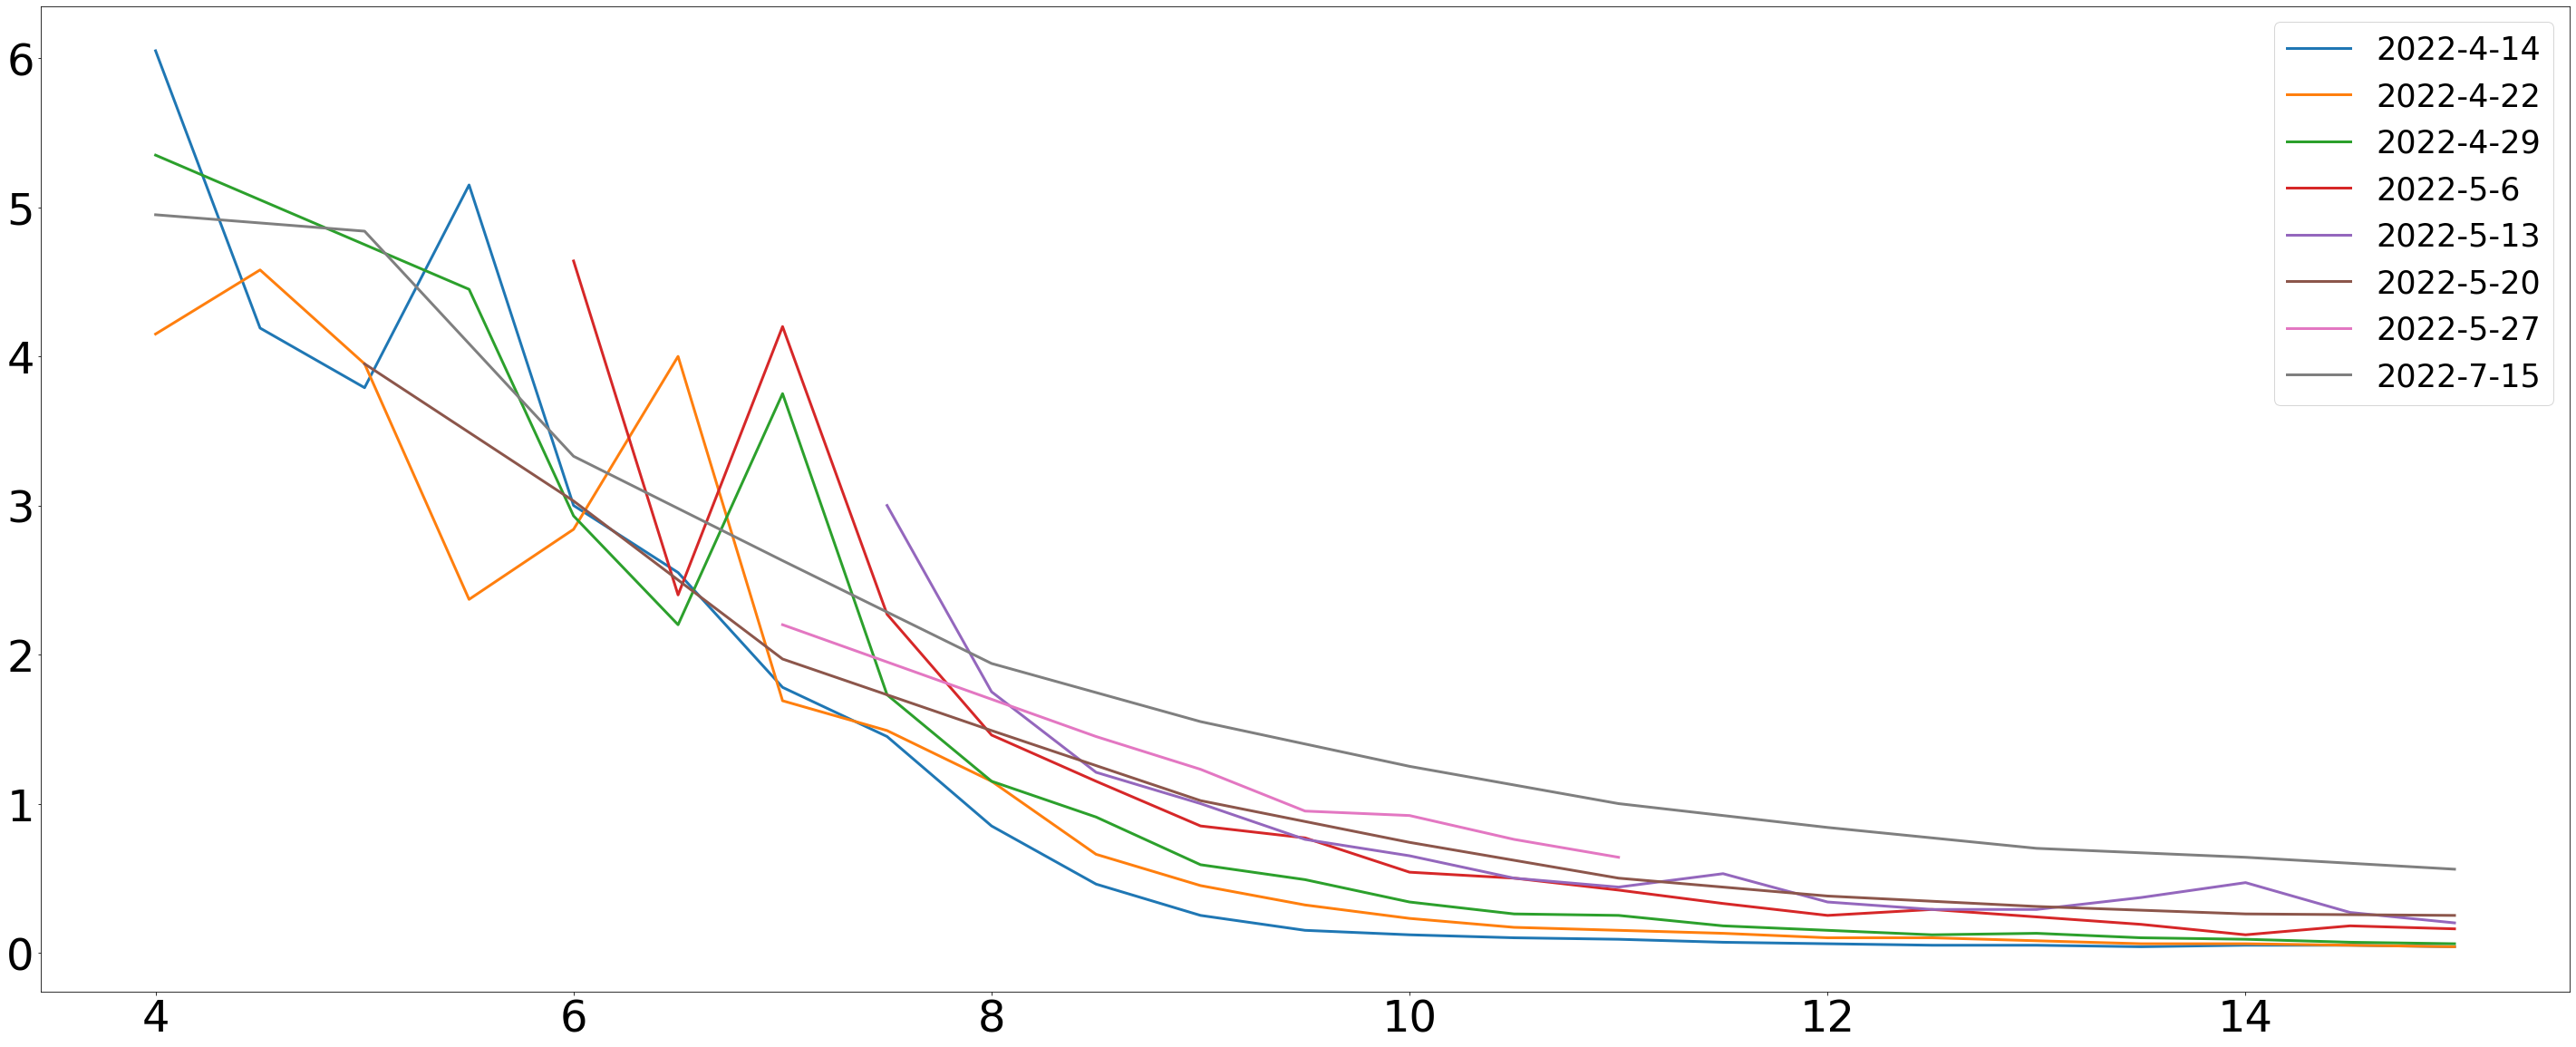

In [368]:
PlottingMain.plotDoeStrike("C", (4, 15), ['range', "180D"], 'lastPrice')